## Analysis on Pyber

### Trends Observed from the Data Analysis on Pyber.
-  The fares in the rural areas are comparatively more higher followed by Sub-urban areas and cheapest in the Urban areas.
-  Majority of the profit for Pyber is from the Urban areas contributing about 62% of the revenue of Pyber.
-  The number of drivers is the highest in the Urban areas.
-  The highest number of rides is in one of the Sub-urban areas which seems to be an outlier.


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Setting the file path for clinical trial data file
filepath1=os.path.join("raw_data","city_data.csv") 
# Setting the file path for mouse drug data file
filepath2=os.path.join("raw_data","ride_data.csv")

# Reading the csv file
City_data=pd.read_csv(filepath1)
Ride_data=pd.read_csv(filepath2)

# Combining the data files to one single dataframe
Combined_data=pd.merge(Ride_data,City_data,on="city",how="left")


## Bubble Plot of Ride Sharing Data

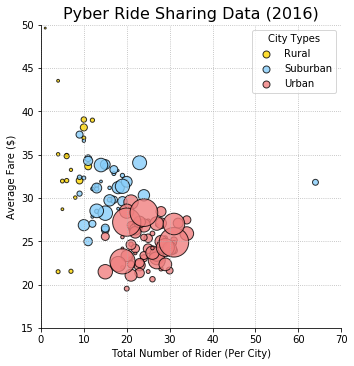

In [3]:
# Bubble plot
# Grouping by type and city to find the average fare
Bubble_DF1=Combined_data.groupby(["type","city"],as_index=True).mean()["fare"].to_frame().reset_index()
# Grouping by type and city to find number of rides
Bubble_DF2=Combined_data.groupby(["type","city"],as_index=True).count()["ride_id"].to_frame().reset_index()

# Merging both the DataFrames
Bubble_DF=pd.merge(Bubble_DF1,Bubble_DF2,on=["type","city"])
# Renaming the columns to relevant column name
Bubble_DF=Bubble_DF.rename(columns={"ride_id":"no_of_rides","fare":"avg_fare"})

# Setting the x_axis, y_axis and size of markers
size=0.5*Combined_data.groupby(["type","city"],as_index=True).sum()["driver_count"]

# Creates the scatter chart based upon the values above
sns.lmplot(x="no_of_rides",y="avg_fare",data=Bubble_DF,fit_reg=False,hue="type",legend_out=False,
           size=5,scatter_kws={"s": size,'linewidths':1,'edgecolor':'black'},
           palette=dict(Rural="gold", Suburban="lightskyblue", Urban="lightcoral"))

# Setting the legend title, markerscale
plt.legend(title="City Types",loc="best",markerscale=0.3)

# Setting the grid style
plt.grid(linestyle="dotted")

# Setting the x_axis and y_axis limits
plt.xlim(0,70)
plt.ylim(15,50)

# Setting the title, x_axis and y_axis labels
plt.title("Pyber Ride Sharing Data (2016)", fontsize=16)
plt.xlabel("Total Number of Rider (Per City)")
plt.ylabel("Average Fare ($)")

# Prints our scatter plot to the screen
plt.show()

## Total Fares by City Type

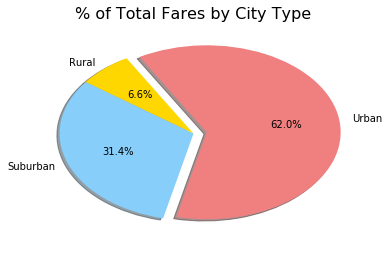

In [4]:
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The values of each section of the pie chart
sizes = Combined_data.groupby(["type"],as_index=False).sum()["fare"].tolist()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("off")

plt.title("% of Total Fares by City Type", fontsize=16)
# Prints our pie chart to the screen
plt.show()


## Total Rides by City Type

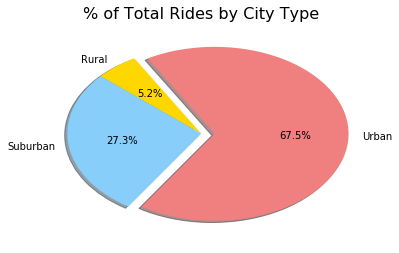

In [5]:
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The values of each section of the pie chart
sizes = Combined_data.groupby(["type"],as_index=True).count()["ride_id"].tolist()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=120)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("off")

plt.title("% of Total Rides by City Type", fontsize=16)
# Prints our pie chart to the screen
plt.show()


## Total Drivers by City Type

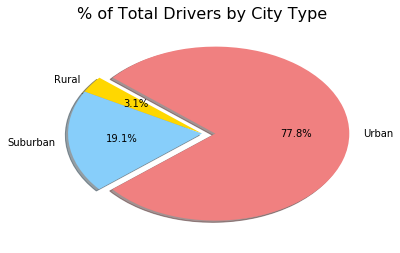

In [6]:
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The values of each section of the pie chart
sizes = City_data.groupby(["type"],as_index=True).sum()["driver_count"]#.tolist()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0,0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("off")

plt.title("% of Total Drivers by City Type", fontsize=16)
# Prints our pie chart to the screen
plt.show()
